https://www.kdnuggets.com/2020/04/introduction-k-nearest-neighbour-algorithm-using-examples.html

In [ ]:
import os
os.listdir() #左邊檔案裏要開放連結到我的雲端硬碟,os.listdir()才能抓到'drive',才能找到放在雲端硬碟的檔案路徑
os.listdir('drive/MyDrive/Colab Notebooks')

In [ ]:
# Import everything
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create a DataFrame
df = pd.read_excel('drive/MyDrive/Colab Notebooks/選址因子0503_Jolene_KNNtest.xlsx')

# Print the head of the data. #df.head() will defaul to first 5 rows
df.head()
df


,營業績效,大學,高中職,同業(連鎖茶飲店),美妝店\n,著名觀光景點/商圈,醫院,工業區,社區,商辦大樓,公家機關,交通站點,量販店,連鎖便利商店\n,連鎖速食店,同業(其他連鎖茶飲店)\n,嫌惡設施：\n加油站、瓦斯行、焚化爐、資源回收場,嫌惡設施：\n鐵道、捷運軌道、高壓電塔、變電所,嫌惡設施：\n傳統市場、夜市
0,3,0,2,11,3,1,2,0,3,0,7,1,4,17,2,1,8,2,3
1,1,1,3,9,3,3,1,0,13,0,4,0,8,36,3,1,2,0,3
2,3,0,3,7,3,1,1,0,21,1,5,0,9,28,4,1,14,0,3
3,3,0,1,9,4,2,1,1,10,1,6,0,5,16,1,1,12,0,3
4,3,0,0,12,5,0,0,0,15,0,3,0,8,25,4,1,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,3,0,3,7,3,1,1,0,21,1,5,0,9,28,4,1,14,0,3
136,3,0,1,9,4,2,1,1,10,1,6,0,5,16,1,1,12,0,3
137,3,0,0,12,5,0,0,0,15,0,3,0,8,25,4,1,6,0,3
138,2,0,0,16,7,3,0,0,343,0,4,4,7,36,5,1,11,2,5


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('營業績效', axis=1))
sc_transform = scaler.transform(df.drop('營業績效', axis=1))
sc_df = pd.DataFrame(sc_transform)

# Now you can safely use sc_df as your input features.
sc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.632456,0.363803,-0.302084,-0.857195,-0.736460,1.322876,-0.408248,-0.696904,-0.632456,1.028992,0.000000,-1.370320,-1.278525,-0.917663,0.0,-0.450183,1.459993,-0.632456
1,1.581139,1.212678,-0.654515,-0.857195,0.552345,0.000000,-0.408248,-0.626713,-0.632456,-0.771744,-0.707107,0.105409,0.873928,-0.114708,0.0,-1.562400,-0.811107,-0.632456
2,-0.632456,1.212678,-1.006947,-0.857195,-0.736460,0.000000,-0.408248,-0.570559,1.581139,-0.171499,-0.707107,0.474342,-0.032368,0.688247,0.0,0.662034,-0.811107,-0.632456
3,-0.632456,-0.485071,-0.654515,-0.395628,-0.092057,0.000000,2.449490,-0.647770,1.581139,0.428746,-0.707107,-1.001388,-1.391812,-1.720618,0.0,0.291295,-0.811107,-0.632456
4,-0.632456,-1.333946,-0.125868,0.065938,-1.380862,-1.322876,-0.408248,-0.612674,-0.632456,-1.371989,-0.707107,0.105409,-0.372229,0.688247,0.0,-0.820922,-0.811107,-0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.632456,1.212678,-1.006947,-0.857195,-0.736460,0.000000,-0.408248,-0.570559,1.581139,-0.171499,-0.707107,0.474342,-0.032368,0.688247,0.0,0.662034,-0.811107,-0.632456
136,-0.632456,-0.485071,-0.654515,-0.395628,-0.092057,0.000000,2.449490,-0.647770,1.581139,0.428746,-0.707107,-1.001388,-1.391812,-1.720618,0.0,0.291295,-0.811107,-0.632456
137,-0.632456,-1.333946,-0.125868,0.065938,-1.380862,-1.322876,-0.408248,-0.612674,-0.632456,-1.371989,-0.707107,0.105409,-0.372229,0.688247,0.0,-0.820922,-0.811107,-0.632456
138,-0.632456,-1.333946,0.578994,0.989071,0.552345,-1.322876,-0.408248,1.689617,-0.632456,-0.771744,2.121320,-0.263523,0.873928,1.491202,0.0,0.105925,1.459993,1.581139


In [ ]:
from sklearn.model_selection import train_test_split

X = sc_transform
y = df['營業績效']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Text(0, 0.5, 'Error Rate')

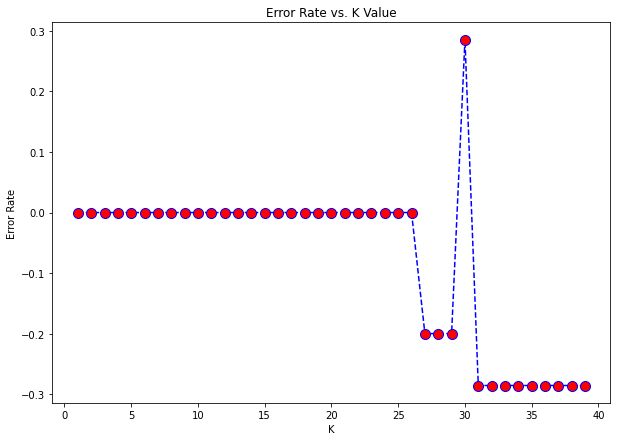

In [ ]:
# Initialize an array that stores the error rates.
from sklearn.neighbors import KNeighborsClassifier

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
k = 35
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[ 0  0  5]
 [ 0 11  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       1.00      1.00      1.00        11
           3       0.79      1.00      0.88        19

    accuracy                           0.86        35
   macro avg       0.60      0.67      0.63        35
weighted avg       0.74      0.86      0.79        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
